# Nopan heittoa

Yatsee peli tilanteessa (2,3,4,5,x) ensimmäisen heiton jälkeen. Mikä on todennäköisyys saada pieni tai iso suora kahdella jäljellä olevalla heitolla? 

Tapahtuma A = 'Saadaan suora' = 'suora 1. heitolla tai suora 2. heitolla' = '1.heitolla 1 tai 6 tai 2.heitolla 1 tai 6'. Tapahtuman A komplementti, eli "vasta" tapahtuma, $\neg $A = 'ei saada suoraa' = 'ei suoraa 1. eikä 2. heitolla' = '1. ja 2. heitolla 2,3,4 tai 5' = '1.heitolla 2,3,4,5' * '2. heitolla 2,3,4 tai 5'. 

Todennäköisyys P($\neg $A) = 2/3 * 2/3 = 4/9 = 0.44444444...

Nyt todennäköisyys, että pelaaja saa suoran on P(A) = 1 - P($\neg $A) = 1 - 4/9 = 5/9 = 0.5555555...

Oltaisiin voitu myös laskea suoraan:

\begin{align*}
P(A) &= \text{'1.heitolla suora' + '2.heitolla suora'} \\ &= \text{'1.heitolla suora' + '1.heitolla ei suoraa ja 2.heitolla suora'} \\ &= \text{'1.heitolla 1 tai 6' + '(1.heitolla 2,3,4 tai 5) ja 2.heitolla 1 tai 6'} \\ &= \text{'1.heitolla 1 tai 6' + '1.heitolla 2,3,4 tai 5' * '2.heitolla 1 tai 6'} \\ &= 2/6 + 4/6 * 2/6 \\ &= 1/3 + 2/9 \\ &= 3/9 + 2/9 \\ &= 5/9 \\ &= 0.55555555...
\end{align*}

## Monte Carlo metodi

Todennäköisyyttä voidaan myös arvioida ns. "Monte Carlo" -menetelmällä. Tällöin simuloidaan tapahtumia ja lasketaan kuinka monta kertaa suotuisa tapahtuma tapahtui. Seuraavassa simuloidaan 10 - 10 000 000 loppupeliä ja lasketaan kuinka usein saadaan suora. Suhteellisen osuuden pitäisi lähestyä laskennallista todennäköisyyttä, kun simulointien lukumäärä kasvaa (suurten lukujen laki). 

In [166]:
import random

random.seed(4)
number_simulations = [10, 100, 1000, 10000 ,100000, 1000000]
percentage_straights = []

for n_sim in number_simulations:
    straight = 0
    for i in range(n_sim):
        # Pelataan n_sim kpl loppupelejä 
        heitto1 = random.randint(1,6)
        if heitto1 == 1 or heitto1 == 6:
            straight += 1
        else:
            # Heitetään uudelleen jos ensimmäinen heitto ei täydennä suoraa
            heitto2 = random.randint(1,6)
            if heitto2 == 1 or heitto2 == 6:
                straight += 1
    # lopuksi lasketaan suhteellinen osuus
    percentage_straights.append((straight)/ float(n_sim))

for i in range(len(percentage_straights)):
    print "Simuloidut loppupelit: ", number_simulations[i]
    print "Suorien suhteellinen osuus: ",  percentage_straights[i]
    print "*************"


Simuloidut loppupelit:  10
Suorien suhteellinen osuus:  0.6
*************
Simuloidut loppupelit:  100
Suorien suhteellinen osuus:  0.61
*************
Simuloidut loppupelit:  1000
Suorien suhteellinen osuus:  0.55
*************
Simuloidut loppupelit:  10000
Suorien suhteellinen osuus:  0.5562
*************
Simuloidut loppupelit:  100000
Suorien suhteellinen osuus:  0.55764
*************
Simuloidut loppupelit:  1000000
Suorien suhteellinen osuus:  0.556521
*************


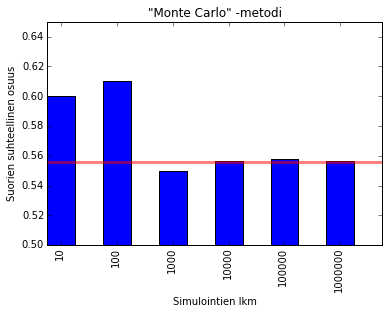

In [161]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.axhline(y = 5/float(9), color = 'r', linewidth = 3, alpha = 0.5)

ind = np.arange(len(number_simulations))
width = 0.5
plt.bar(ind, percentage_straights, width, linewidth = 1, color = 'b', )
plt.xticks(ind + width / 2., ('10', '100', '1000', '10000', '100000', '1000000'), rotation = 'vertical')
plt.ylim(0.5, 0.65)
plt.title('"Monte Carlo" -metodi')
plt.xlabel('Simulointien lkm')
plt.ylabel('Suorien suhteellinen osuus')

plt.show()

## Keskeinen raja-arvo lause

Kun edellisessä kohdassa simuloimme 100 loppupeliä, saimme suorien suhteelliseksi osuudeksi 0.61, joka ei ole kovin hyvä arvio todellisesta arvosta. Kuitenkin jos toistamme 100 heiton sarjaa useammin, saamme keskeisen raja-arvo lauseen (Central limit theorem, CLT) perusteella otoskeskiarvosta harhattoman estimaattorin todennäköisyydelle. Alla suoritamme 100 000 kertaa 100 loppupelin sarjan. Vaikka yksittäisen 100 heiton sarjan tulos vaihteleekin välillä 0.35-0.75, ollaan saatu keskiarvoksi 0.5556691, joka on jo hyvin lähellä totuutta. Lisäksi histogrammiin alkaa muodostua normaalijakauman muoto. 

In [164]:
number_simulations = 100000
games_in_simulation = 100
percentages = []
counter = 0

while counter < number_simulations:
    counter += 1
    straight = 0
    for i in range(games_in_simulation):
        heitto1 = random.randint(1,6)
        if heitto1 == 1 or heitto1 == 6:
            straight += 1
        else:
            # Heitetään uudelleen jos ensimmäinen heitto ei täydennä suoraa
            heitto2 = random.randint(1,6)
            if heitto2 == 1 or heitto2 == 6:
                straight += 1
    percentages.append((straight)/ float(games_in_simulation))
    

0.049798567044
Keskiarvo: 0.5556006
Pienin:  0.35
Suurin:  0.76


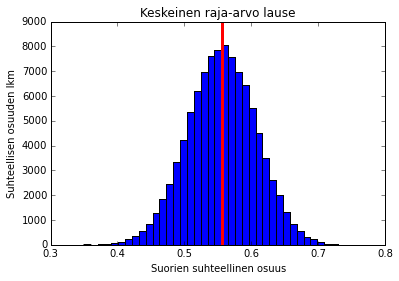

In [165]:
import matplotlib.mlab as mlab

ka = np.mean(percentages)
minimi = min(percentages)
maksimi = max(percentages)
print np.std(percentages)

print 'Keskiarvo:', ka
print 'Pienin: ', minimi
print 'Suurin: ', maksimi

plt.hist(percentages, 40)
plt.title('Keskeinen raja-arvo lause')
plt.axvline(ka, color = 'r', linewidth = 3)
plt.xlabel('Suorien suhteellinen osuus')
plt.ylabel('Suhteellisen osuuden lkm')
plt.show()

## numberphile

Simuloinnin voi toki tehdä monellakin tapaa. Numberphilen Brady voi demonstroida perinteistä yatzee tyyliä. Suosittelen muutenkin kyseisen jätkän videoita jos matematiikka kiinnostaa edes jollain tasolla.

* [numberphile yatzee](https://www.youtube.com/watch?v=fiTwar7mFws)

* [numberphile simpsons](https://www.youtube.com/watch?v=ReOQ300AcSU)

* [numberphile zero](https://www.youtube.com/watch?v=BRRolKTlF6Q)